In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
import itertools

import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('bmh')

C:\Users\Sanap\Miniconda2\envs\py36\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
sales_data = pd.read_csv('Tractor-Sales.csv')
sales_data.head()

,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203


In [3]:
dates = pd.date_range(start='2003-01-01', freq='MS', periods=len(sales_data))

In [4]:
import calendar

sales_data['Month'] = dates.month
sales_data['Month'] = sales_data['Month'].apply(lambda x: calendar.month_abbr[x])
sales_data['Year'] = dates.year

In [5]:
sales_data.head()

,Month-Year,Number of Tractor Sold,Month,Year
0,Jan-03,141,Jan,2003
1,Feb-03,157,Feb,2003
2,Mar-03,185,Mar,2003
3,Apr-03,199,Apr,2003
4,May-03,203,May,2003


In [6]:
sales_data.drop(labels='Month-Year', axis=1, inplace=True)

sales_data.rename(columns={'Number of Tractor Sold':'Tractor-Sales'}, inplace=True)

sales_data = sales_data[['Month', 'Year', 'Tractor-Sales']]

sales_data.set_index(dates, inplace=True)

In [7]:
sales_data.head()

,Month,Year,Tractor-Sales
2003-01-01,Jan,2003,141
2003-02-01,Feb,2003,157
2003-03-01,Mar,2003,185
2003-04-01,Apr,2003,199
2003-05-01,May,2003,203


In [8]:
sales_ts = sales_data['Tractor-Sales']

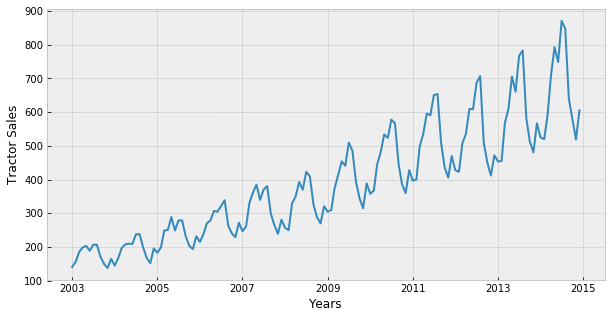

In [9]:
plt.figure(figsize=(10,5))
plt.plot(sales_ts)
plt.xlabel('Years')
plt.ylabel('Tractor Sales')

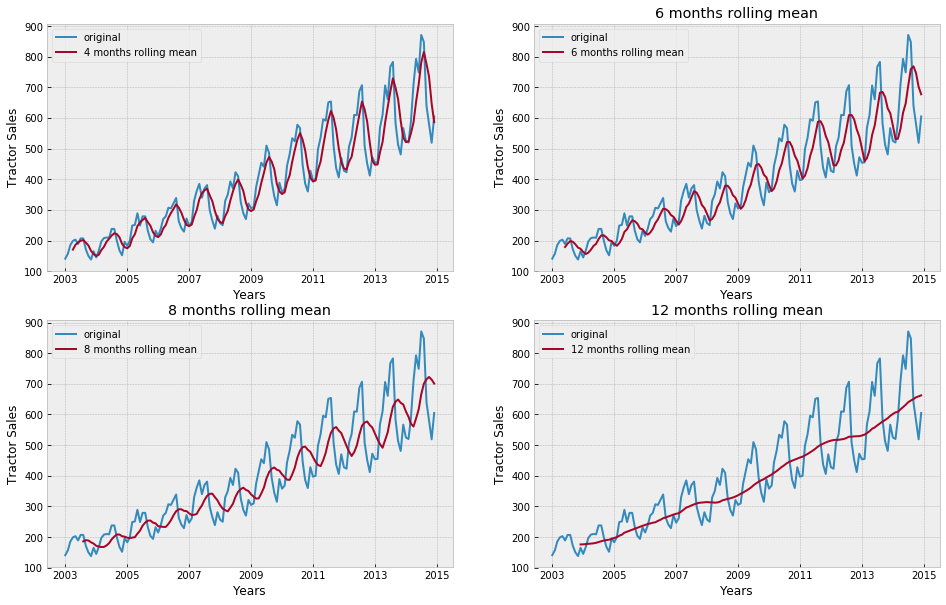

In [10]:
fig, axes = plt.subplots(2, 2, sharex=False, sharey=False, )
fig.set_figheight(10)
fig.set_figwidth(16)

axes[0][0].plot(sales_ts.index, sales_ts, label='original')
axes[0][0].plot(sales_ts.index, sales_ts.rolling(window=4).mean(), label='4 months rolling mean')
axes[0][0].set_xlabel('Years')
axes[0][0].set_ylabel('Tractor Sales')
axes[0][0].set_title('')
axes[0][0].legend(loc='best')
axes[0][1].plot(sales_ts.index, sales_ts, label='original')
axes[0][1].plot(sales_ts.index, sales_ts.rolling(window=6).mean(), label='6 months rolling mean')
axes[0][1].set_xlabel('Years')
axes[0][1].set_ylabel('Tractor Sales')
axes[0][1].set_title('6 months rolling mean')
axes[0][1].legend(loc='best')
axes[1][0].plot(sales_ts.index, sales_ts, label='original')
axes[1][0].plot(sales_ts.index, sales_ts.rolling(window=8).mean(), label='8 months rolling mean')
axes[1][0].set_xlabel('Years')
axes[1][0].set_ylabel('Tractor Sales')
axes[1][0].set_title('8 months rolling mean')
axes[1][0].legend(loc='best')
axes[1][1].plot(sales_ts.index, sales_ts, label='original')
axes[1][1].plot(sales_ts.index, sales_ts.rolling(window=12).mean(), label='12 months rolling mean')
axes[1][1].set_xlabel('Years')
axes[1][1].set_ylabel('Tractor Sales')
axes[1][1].set_title('12 months rolling mean')
axes[1][1].legend(loc='best')

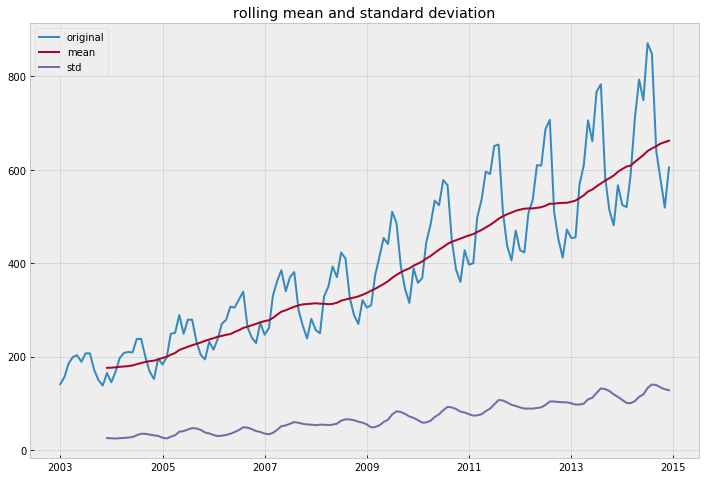

In [11]:
import matplotlib
rolstd = sales_ts.rolling(window=12).std()
rolmean = sales_ts.rolling(window=12).mean()


figsize = plt.rcParams['figure.figsize']
figsize[0]=12
figsize[1]=8
orig = plt.plot(sales_ts, label='original')
mean = plt.plot(rolmean, label='mean')
std = plt.plot(rolstd, label='std')
plt.legend(loc='best')
plt.title('rolling mean and standard deviation')

plt.show(block=False)

In [12]:
from statsmodels.tsa.stattools import adfuller

print('Dicky-Fuller test results: ')

dftest = adfuller(sales_ts, autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistc', 'p-value', '#lags used', 'No. of Observations Used'])

for key, value in dftest[4].items():
    dfoutput['Critical Value {0}'.format(key)] = value
    
print(dfoutput)

Dicky-Fuller test results: 
Test Statistc                 1.108825
p-value                       0.995291
#lags used                   14.000000
No. of Observations Used    129.000000
Critical Value 1%            -3.482088
Critical Value 5%            -2.884219
Critical Value 10%           -2.578864
dtype: float64


In [13]:
monthly_sales_data=sales_data.pivot_table(values='Tractor-Sales',columns='Year', index='Month')

monthly_sales_data=monthly_sales_data.reindex(index=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 
                                                     'Sep', 'Oct', 'Nov', 'Dec'])

monthly_sales_data

Year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Month,,,,,,,,,,,,
Jan,141,145,183,215,247,257,305,358,397,428,454,525
Feb,157,168,200,239,261,250,310,368,400,423,455,520
Mar,185,197,249,270,330,329,374,444,498,507,568,587
Apr,199,208,251,279,362,350,414,482,536,536,610,710
May,203,210,289,307,385,393,454,534,596,610,706,793
Jun,189,209,249,305,340,370,441,524,591,609,661,749
Jul,207,238,279,322,370,423,510,578,651,687,767,871
Aug,207,238,279,339,381,410,486,567,654,707,783,848
Sep,171,199,232,263,299,326,393,447,509,509,583,640


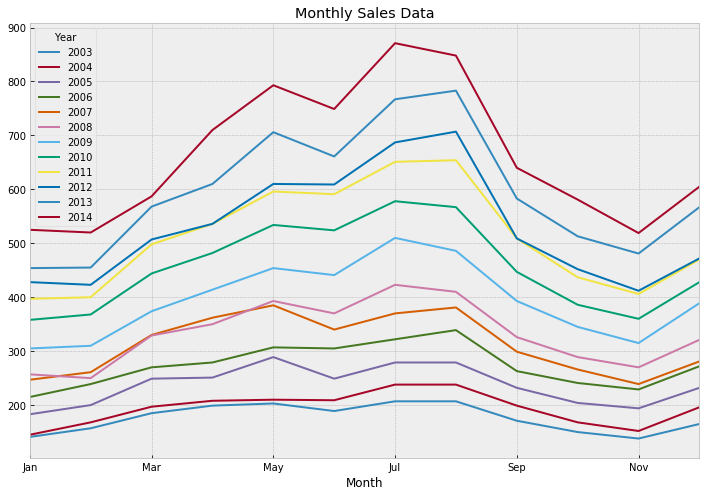

In [14]:
monthly_sales_data.plot()
plt.title('Monthly Sales Data')

In [15]:
yearly_sales_data = sales_data.pivot_table(index='Year', columns='Month', values='Tractor-Sales')

yearly_sales_data=yearly_sales_data[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 
                                                     'Sep', 'Oct', 'Nov', 'Dec']]

yearly_sales_data

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2003,141,157,185,199,203,189,207,207,171,150,138,165
2004,145,168,197,208,210,209,238,238,199,168,152,196
2005,183,200,249,251,289,249,279,279,232,204,194,232
2006,215,239,270,279,307,305,322,339,263,241,229,272
2007,247,261,330,362,385,340,370,381,299,266,239,281
2008,257,250,329,350,393,370,423,410,326,289,270,321
2009,305,310,374,414,454,441,510,486,393,345,315,389
2010,358,368,444,482,534,524,578,567,447,386,360,428
2011,397,400,498,536,596,591,651,654,509,437,406,470


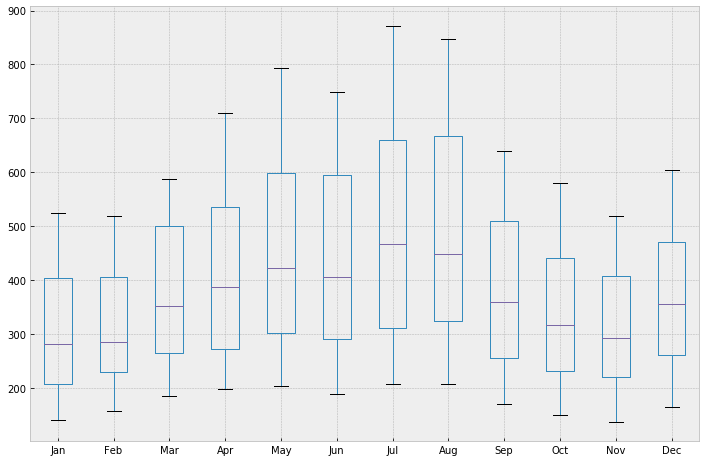

In [16]:
yearly_sales_data.boxplot()

In [17]:
decomposition = sm.tsa.seasonal_decompose(sales_ts, model='multiplicative')

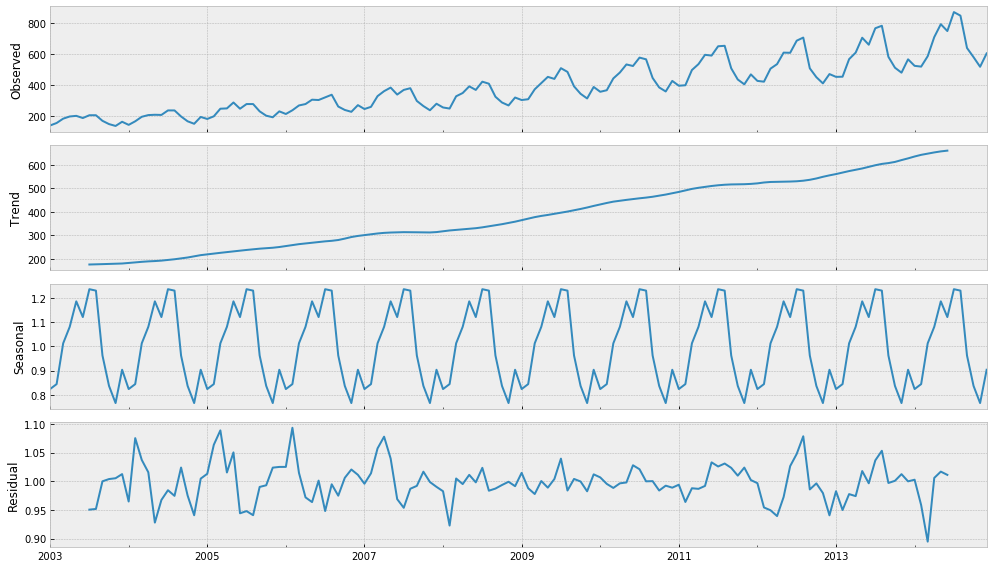

In [18]:
fig = decomposition.plot()
fig.set_figwidth(14)
plt.show()

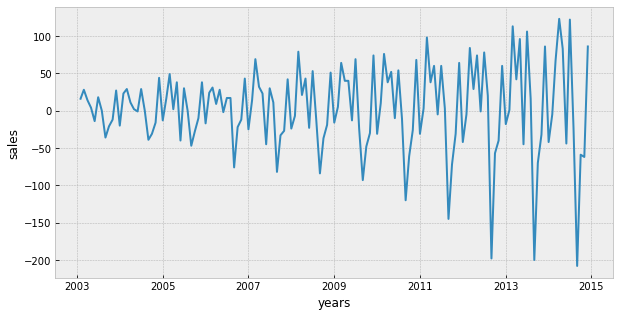

In [19]:
plt.figure(figsize=(10,5))
plt.plot(sales_ts.diff(periods=1))
plt.xlabel('years')
plt.ylabel('sales')

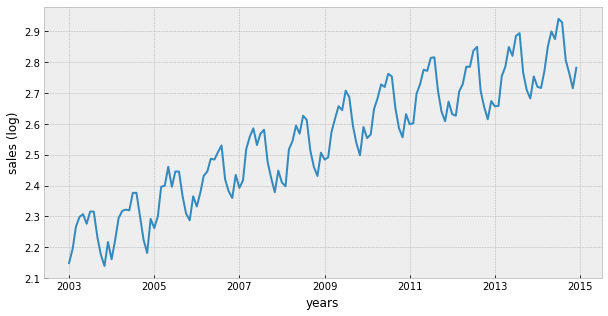

In [20]:
plt.figure(figsize=(10,5))
plt.plot(np.log10(sales_ts))
plt.xlabel('years')
plt.ylabel('sales (log)')

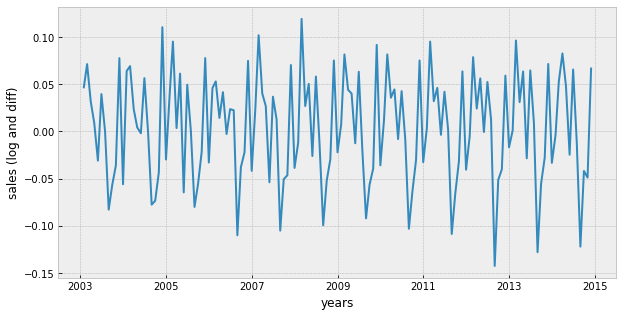

In [21]:
plt.figure(figsize=(10,5))
plt.plot(np.log10(sales_ts).diff(periods=1))
plt.xlabel('years')
plt.ylabel('sales (log and diff)')

In [22]:
sales_ts_log = np.log10(sales_ts)
sales_ts_log.dropna(inplace=True)

sales_ts_log_diff = sales_ts_log.diff(periods=1)
sales_ts_log_diff.dropna(inplace=True)

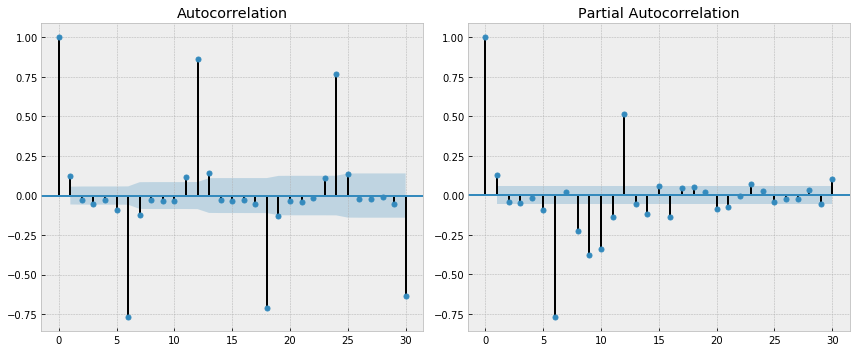

In [23]:
fig, axes = plt.subplots(1,2, sharex=False, sharey=False)
fig.set_figheight(5)
smt.graphics.plot_acf(sales_ts_log_diff, lags=30, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(sales_ts_log_diff, lags=30, ax=axes[1], alpha=0.5)
plt.tight_layout()